# Global indicator project - Phoenix, Arizona
This notebook is created to import census block group data of Maricopa County

In [1]:
import networkx as nx
import time 
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import requests
import fiona
import pandas as pd
import geopandas as gpd

## Load county census block group data

In [2]:
Phx_blockgroup = gpd.GeoDataFrame.from_file('../data/Maricopa_County/BlockGroup_Data.shp')

In [15]:
Phx_blockgroup.head()

,TRACTCE10,BLOCKCE,BLOCKID10,HOUSING10,POP10,Sum_Employ,geometry
0,012100,2126,040270121002126,5,15,0.0,"POLYGON ((-113.333767 32.93470400000003, -113...."
1,012100,2122,040270121002122,0,0,0.0,"POLYGON ((-113.333812 33.08803399999996, -113...."
2,012100,2120,040270121002120,7,23,0.0,"POLYGON ((-113.333801 33.07349199999997, -113...."
3,012100,2119,040270121002119,0,0,0.0,"POLYGON ((-113.333797 33.05896800000004, -113...."
4,980004,1009,040279800041009,0,0,0.0,"POLYGON ((-113.333723 32.58333200000004, -113...."


## load city boundary shapfile

In [19]:
Phx_studyregion = gpd.GeoDataFrame.from_file('../data/OSM/Phoenix, Arizona, USA_shape_201905/Phoenix, Arizona, USA_shape_201905.shp')

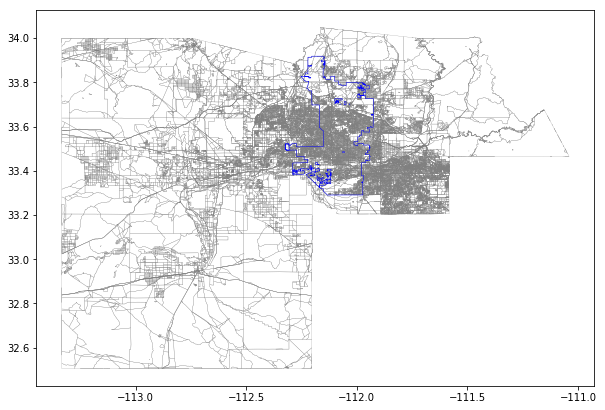

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = Phx_blockgroup.plot(ax=ax, facecolor="none", edgecolor='grey', linewidth=0.2)
ax = Phx_studyregion.plot(ax=ax, facecolor="none", edgecolor='blue', linewidth=0.5)
plt.show()

In [26]:
def map_variable(df, df1, col):
    values = df.dropna(subset=[col])
    ax = values.plot(column=col, scheme='quantiles', k=6, cmap='YlOrBr', figsize=(10,10))
    ax = df1.plot(ax=ax, facecolor="none", edgecolor='blue', linewidth=1)
    plt.show()

## population

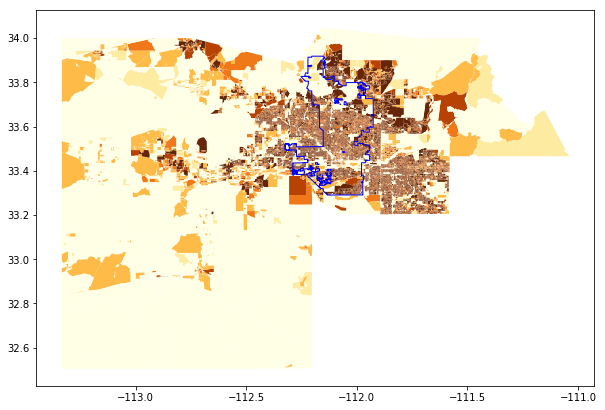

In [27]:
map_variable(Phx_blockgroup, Phx_studyregion, 'POP10')

## dwellings

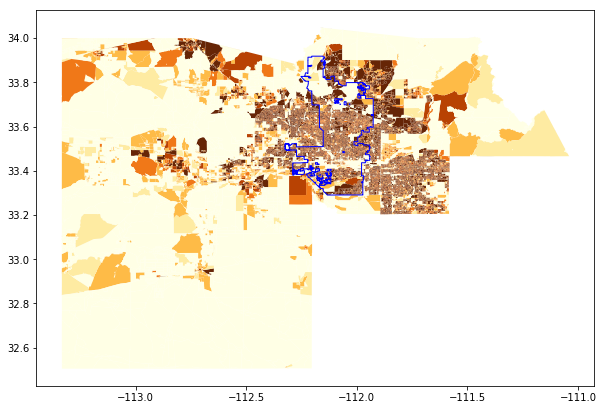

In [28]:
map_variable(Phx_blockgroup, Phx_studyregion, 'HOUSING10')

## number of people employed in each area

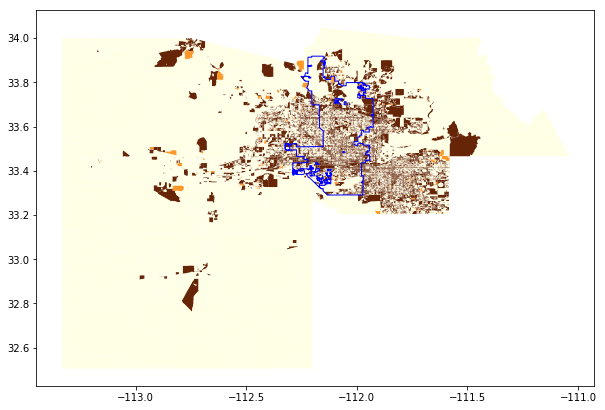

In [29]:
map_variable(Phx_blockgroup, Phx_studyregion, 'Sum_Employ')

## load and plot the land use shapfile

In [2]:
landuse = ['Civic', 'Entertainment', 'Food', 'Office', 'Parks', 'Residential', 'Retail']

filename = '../data/Maricopa_County/Land_Use/{}_2018.shp'

In [3]:
Phx_Civic = gpd.GeoDataFrame.from_file(filename.format(landuse[0]))


In [4]:
Phx_Civic = gpd.GeoDataFrame.from_file(filename.format(landuse[0]))
Phx_Entertainment = gpd.GeoDataFrame.from_file(filename.format(landuse[1]))
Phx_Food = gpd.GeoDataFrame.from_file(filename.format(landuse[2]))
Phx_Office = gpd.GeoDataFrame.from_file(filename.format(landuse[3]))
Phx_Parks = gpd.GeoDataFrame.from_file(filename.format(landuse[4]))
Phx_Residential = gpd.GeoDataFrame.from_file(filename.format(landuse[5]))
Phx_Retail = gpd.GeoDataFrame.from_file(filename.format(landuse[6]))

Phx_Employer = gpd.GeoDataFrame.from_file('../data/Maricopa_County/Land_Use/Employer2016.shp')

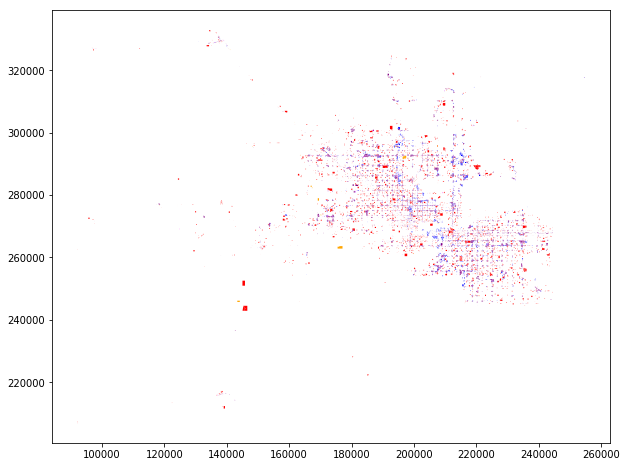

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = Phx_Civic.plot(ax=ax, facecolor="red")
ax = Phx_Entertainment.plot(ax=ax, facecolor="orange")
ax = Phx_Food.plot(ax=ax, facecolor="magenta")
ax = Phx_Office.plot(ax=ax, facecolor="blue")
#ax = Phx_Parks.plot(ax=ax, facecolor="none", edgecolor='green', linewidth=1)
#ax = Phx_Residential.plot(ax=ax, facecolor="yellow")
ax = Phx_Retail.plot(ax=ax, facecolor="purple")
#ax = Phx_Employer.plot(ax=ax, facecolor="k")


plt.show()

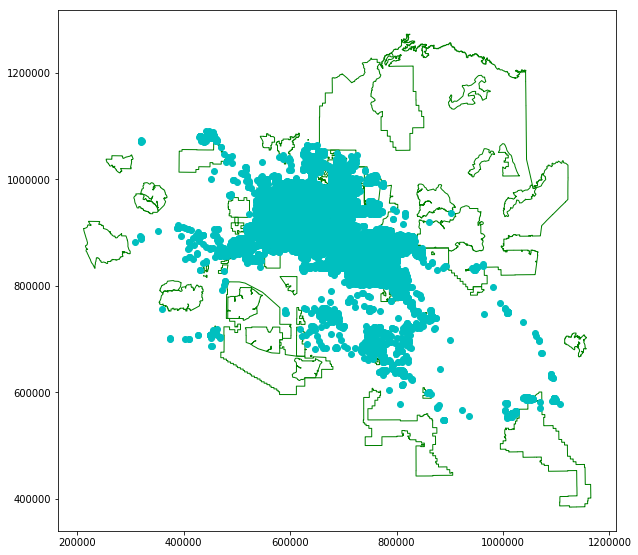

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
#ax = Phx_Civic.plot(ax=ax, facecolor="red")
#ax = Phx_Entertainment.plot(ax=ax, facecolor="orange")
#ax = Phx_Food.plot(ax=ax, facecolor="magenta")
#ax = Phx_Office.plot(ax=ax, facecolor="blue")
ax = Phx_Parks.plot(ax=ax, facecolor="none", edgecolor='green', linewidth=1)
#ax = Phx_Residential.plot(ax=ax, facecolor="yellow")
#ax = Phx_Retail.plot(ax=ax, facecolor="purple")
ax = Phx_Employer.plot(ax=ax, facecolor="c", )

plt.show()

#are these in a different projection plane?

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = Phx_Residential.plot(ax=ax, facecolor="yellow")
plt.show()
